##### THIS FILE IS USED TO RUN K-MEAN #####

In [1]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import math
import os
from dateutil.relativedelta import relativedelta
from sklearn.cluster import KMeans
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_tree
# Logistic Regresison 
import statsmodels
from  statsmodels.discrete.discrete_model import Logit
import sklearn
from sklearn.linear_model import LogisticRegression

In [2]:
# This is used to block warning messages
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
# Or ignore specific warnings by category (e.g., FutureWarnings)
warnings.filterwarnings("ignore", category=FutureWarning)
# This is used to edit image
from IPython.display import Image
from IPython.core.display import HTML 

In [3]:
data_df = pd.read_csv(r'C:\Users\Admin\RBAC\Transformed_Data\Customer_data.csv', index_col=0)

In [4]:
data_df.columns

Index(['CustomerID', 'mean_days_between_purchase', 'max_days_between_purchase',
       'TotalValue', 'CountOrder', 'ValuePerOrder', 'Channel_Delivery',
       'Channel_TakeAway', 'Channel_DineIn', 'OrderFrom_Store',
       'OrderFrom_Web', 'OrderFrom_CallCenter', 'OrderFrom_App',
       'CustomerGender', 'Province', 'First_Order_Day', 'Last_Order_Day',
       'LifeTime'],
      dtype='object')

In [5]:
data_df['Last_Order_Day'] = pd.to_datetime(data_df['Last_Order_Day'])
data_df['Days_between_last_cur'] = (pd.to_datetime(data_df['Last_Order_Day'].max()) - data_df['Last_Order_Day']).dt.days

# 1 | First K_mean

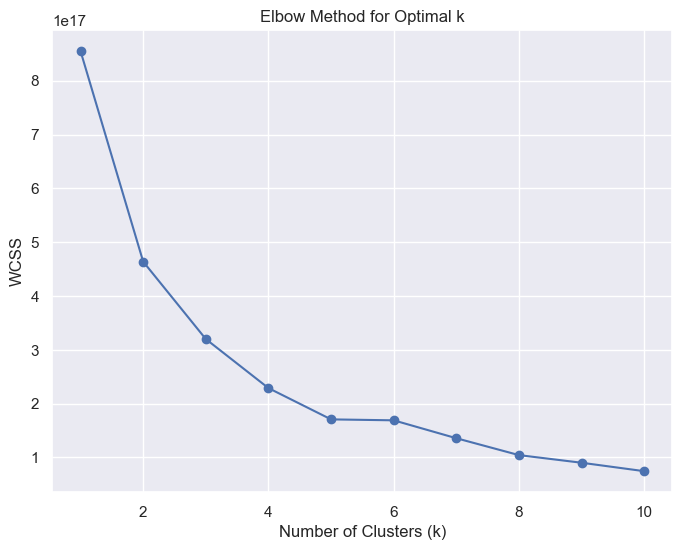

,k_values,wcss,Percentage_Reduction
0,1,8.549137e+17,0.000000
1,2,4.638632e+17,45.741522
2,3,3.200432e+17,31.004819
3,4,2.289370e+17,28.466870
4,5,1.708056e+17,25.391848
5,6,1.690511e+17,1.027187
6,7,1.357952e+17,19.672102
7,8,1.044231e+17,23.102491
8,9,9.025003e+16,13.572771
9,10,7.458217e+16,17.360503


In [6]:
wcss = []  # List to store the within-cluster sum of squares
kmean_col = ['mean_days_between_purchase','Days_between_last_cur','ValuePerOrder','LifeTime','TotalValue']
k_values = range(1, 11)  # You can adjust the range as needed

for k in k_values:
    wcss_for_k = []  # List to store WCSS for a specific k value
    for _ in k_values:  # Number of random initializations (adjust as needed)
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=3)  # You can adjust other parameters
        kmeans.fit(data_df[kmean_col])
        wcss_for_k.append(kmeans.inertia_)  # Inertia is WCSS
    wcss.append(np.mean(wcss_for_k))  # Take the mean of WCSS for this k value

sns.set_theme() 
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Create df
elbow_df = pd.DataFrame({'k_values':k_values,'wcss':wcss})
percentage_reduction = [0,]
for i in range(1, len(elbow_df)):
    wcss_previous = elbow_df['wcss'][i - 1]
    wcss_current = elbow_df['wcss'][i]
    reduction = ((wcss_previous - wcss_current) / wcss_previous) * 100
    percentage_reduction.append(reduction)

elbow_df['Percentage_Reduction'] = percentage_reduction
elbow_df.to_csv(r'Kmean_Elbow.csv')
display(elbow_df)

# 2 | Explore K-mean

In [7]:
k_values_to_choose = 5
kmean_col = ['mean_days_between_purchase','Days_between_last_cur','ValuePerOrder','LifeTime','TotalValue']

kmeans = KMeans(n_clusters= k_values_to_choose, init='k-means++', n_init='auto', random_state=3)  # You can adjust other parameters
kmeans.fit(data_df[kmean_col])
data_df['Cluster'] = kmeans.labels_
# def rename(x):
#     if x == 0: return 'The Explorers'
#     elif x == 1: return 'The Regulars'
#     elif x == 2: return 'The Sleepers'
#     elif x == 3: return 'The Loyalists'
#     elif x == 4: return 'The Champions'
# data_df['Cluster'] = data_df['Cluster'].apply(rename)


In [9]:
# data_df.to_csv(r'Kmean_4.csv')